# Final Project: Regression Analysis

**Author:** James Pinkston<br>
**Date:** November 25, 2025

**Introduction:** This project will demonstrate regression modeling techniques using a real-world dataset to predict insurance charges based on age, BMI, and smoking status.

Data Source:  [Medical Costs Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)

The following will be covered in this project:

- Load and explore a dataset.
- Choose and justify features for predicting a target variable.
- Train a regression model and evaluate performance.
- Compare multiple regression approaches.
- Document your work in a structured Jupyter Notebook.
- Conduct a peer review of a classmate's project.

### Import External Python Libraries

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

## Section 1. Import and Inspect the Data

### 1.1 Load the dataset and display the first 10 rows.

In [8]:
# Load the insurance Dataset
insurance_df = pd.read_csv("../data/insurance.csv")

# Display the first 10 rows
insurance_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### 1.2 Check for missing values and display summary statistics

In [9]:
# Check for missing values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
# Display summary statistics
print(insurance_df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Reflection 1

What do you notice about the dataset? Are there any data issues?  **<span style="color: darkgreen">There are 7 columns (age, sex, bmi, children, smoker, region, charges) and none of the columns have any missing data.</span>**

## Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>,
        <Axes: xlabel='charges', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>,
        <Axes: xlabel='charges', ylabel='bmi'>],
       [<Axes: xlabel='age', ylabel='children'>,
        <Axes: xlabel='bmi', ylabel='children'>,
        <Axes: xlabel='children', ylabel='children'>,
        <Axes: xlabel='charges', ylabel='children'>],
       [<Axes: xlabel='age', ylabel='charges'>,
        <Axes: xlabel='bmi', ylabel='charges'>,
        <Axes: xlabel='children', ylabel='charges'>,
        <Axes: xlabel='charges', ylabel='charges'>]], dtype=object)

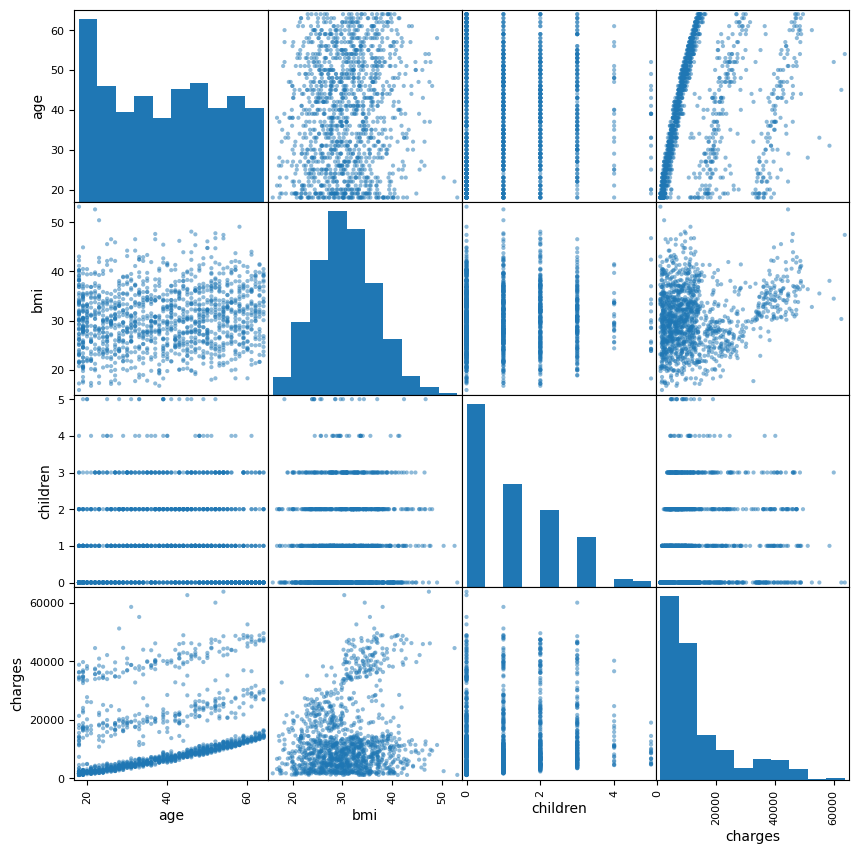

In [11]:
# Create a scatter matrix using only numeric attributes
attributes = ["age", "bmi", "children", "charges"]
scatter_matrix(insurance_df[attributes], figsize=(10, 10))

Text(0.5, 1.0, 'Violin Plot of Age')

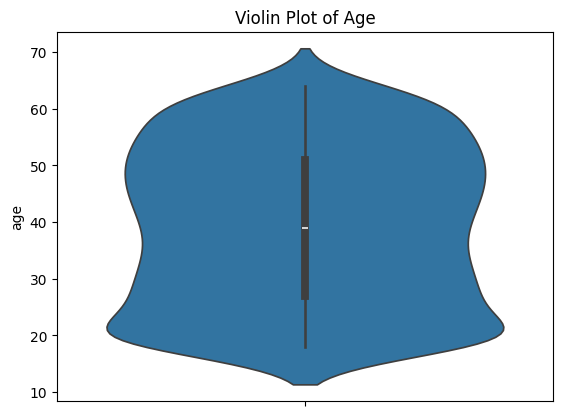

In [14]:
# Create a violin plot of age
sns.violinplot(y="age", data=insurance_df)
plt.title("Violin Plot of Age")

Text(0.5, 1.0, 'Violin Plot of BMI')

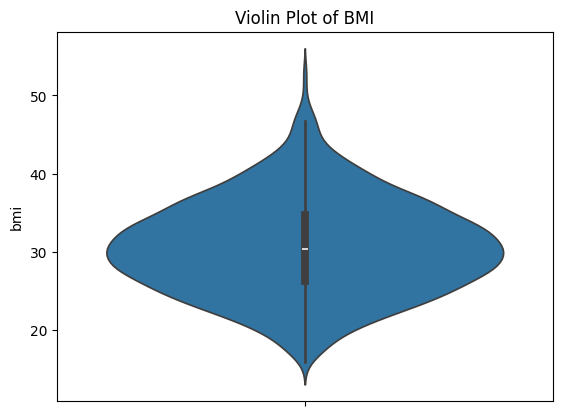

In [15]:
# Create a violin plot of bmi
sns.violinplot(y="bmi", data=insurance_df)
plt.title("Violin Plot of BMI")

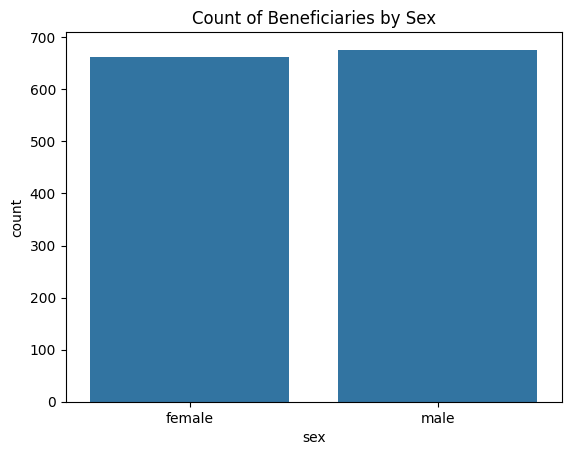

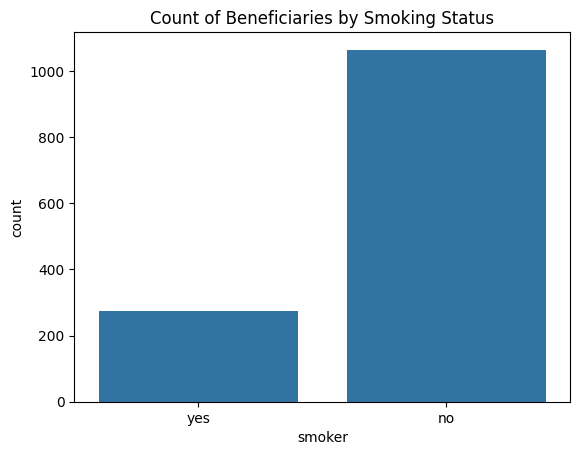

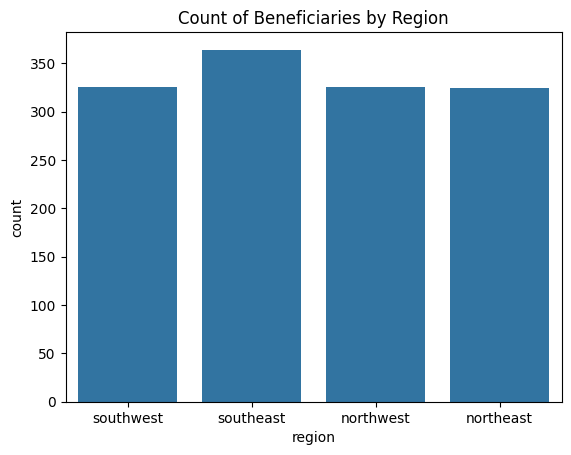

In [17]:
# Count plot for sex
sns.countplot(x="sex", data=insurance_df)
plt.title("Count of Beneficiaries by Sex")
plt.show()

# Count plots for smoker
sns.countplot(x="smoker", data=insurance_df)
plt.title("Count of Beneficiaries by Smoking Status")
plt.show()

# Count plots for region
sns.countplot(x="region", data=insurance_df)
plt.title("Count of Beneficiaries by Region")
plt.show()

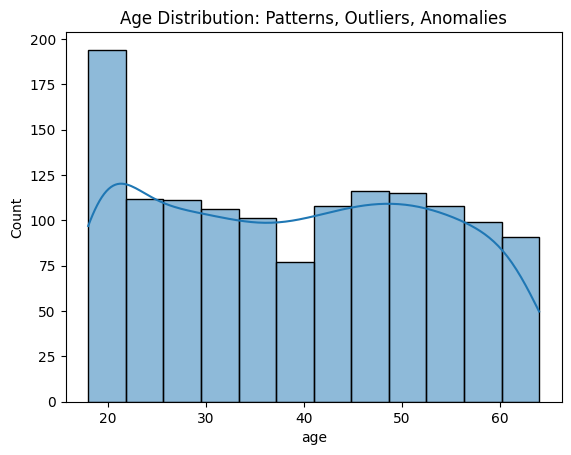

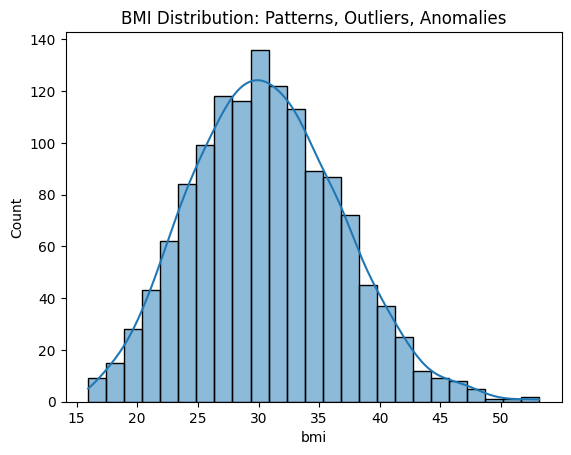

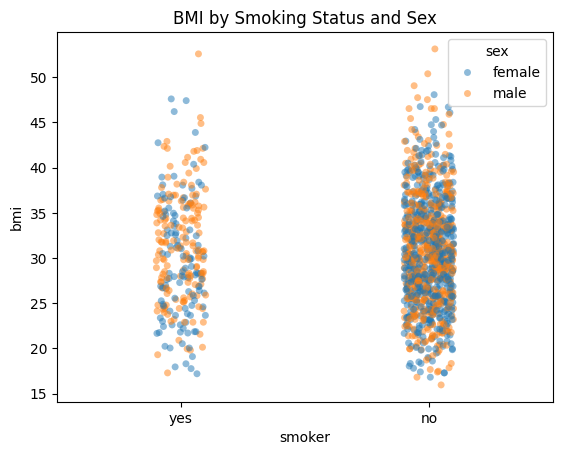

In [20]:
# Identify patterns, outliers, and anomalies in feature distributions.

# age
sns.histplot(insurance_df["age"], kde=True)
plt.title("Age Distribution: Patterns, Outliers, Anomalies")
plt.show()

# bmi
sns.histplot(insurance_df["bmi"], kde=True)
plt.title("BMI Distribution: Patterns, Outliers, Anomalies")
plt.show()

# smoking status
sns.stripplot(x="smoker", y="bmi", hue="sex", data=insurance_df, jitter=True, alpha=0.5)
plt.title("BMI by Smoking Status and Sex")
plt.show()

Text(0, 0.5, 'Frequency')

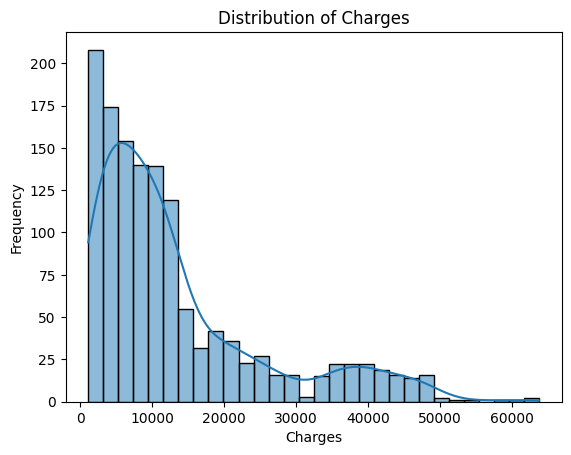

In [26]:
# Check for frequency of charges
sns.histplot(insurance_df["charges"], bins=30, kde=True)
plt.title("Distribution of Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")

### 2.2 Handle missing values and clean data

In [28]:
# Convert categorical data to numeric data
insurance_df["sex"] = insurance_df["sex"].map({"male": 0, "female": 1})
insurance_df["smoker"] = insurance_df["smoker"].map({"no": 0, "yes": 1})
insurance_df["region"] = insurance_df["region"].map({"northwest": 0, "northeast": 1, "southwest": 2, "southeast": 3})

### Reflection 2

What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?  **<span style="color: darkgreen">Age and Fare are right-skewed with a few extreme values. Pclass and Sex shows that 3rd class passengers outnumber 1st and 2nd class, and there are more males than females. Most passengers embarked from port 'S'. Fares has a few extreme outliers among 1st class passengers. The majority of passengers are between 20 and 40 years old. I inputed missing values for Age using the median, and for Embarked I used mode. I also encoded Sex and Embarked as numerical values. I created two new features to improve performance: FamilySize and Alone.</span>**

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target

- Select two or more input features
  - Input Features:  Pclass, Sex, Age, Fare, FamilySize, Alone
- Select a target variable
  - Target Feature:  Survived (Classification) 0 = No, 1 = Yes

- Justify your selection with reasoning
  - Pclass:  represents socioeconomic status - historically correlated with survival
  - Sex:  strongly predictive due to evacuation priority (women and children first)
  - Age:  shows child/adult/elder effects on survival
  - Fare:  also shows socioeconomic status
  - FamilySize:  combines SibSp + Parch to represent group size - there would also be a greather attempt to keep families together
  - Alone:  Solo males without families are assumed to have a lesser chance of survival

### 3.2 Define X and y

In [54]:
# Select multiple input features
X = titanic_df[["Age", "Fare", "Pclass", "Sex", "FamilySize", "Alone"]]

# Select the target variable
y = titanic_df["Survived"]

### Reflection 3

Why did you choose these features? How might they impact predictions or accuracy?  **<span style="color: darkgreen">I selected Age, Fare, Pclass, Sex, and FamilySize because they likely influence survival outcomes. Age and Sex reflect physical and social factors affecting priority in rescue, while Pclass and Fare represent socioeconomic status. FamilySize captures social support during evacuation. These features together provide a balanced mix of demographic and situational features that should improve model accuracy.</span>**

## Section 4. Train a Model (Classification: Decision Tree)

### 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class inbalance is an issue)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training Set:", X_train.shape, y_train.shape)
print("Test Set:", X_test.shape, y_test.shape)

Training Set: (712, 6) (712,)
Test Set: (179, 6) (179,)


### 4.2 Train model using Scikit-Learn model.fit() method

In [56]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 4.3 Evaluate performance

In [58]:
# Predict on training data
y_pred = tree_model.predict(X_train)
print("Results for Decision Tree on Training Data")
print(classification_report(y_train, y_pred))

# Predict on test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on Test Data")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on Training Data
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       439
           1       0.97      0.93      0.95       273

    accuracy                           0.96       712
   macro avg       0.96      0.96      0.96       712
weighted avg       0.96      0.96      0.96       712

Results for Decision Tree on Test Data
              precision    recall  f1-score   support

           0       0.65      0.66      0.65       110
           1       0.44      0.42      0.43        69

    accuracy                           0.57       179
   macro avg       0.54      0.54      0.54       179
weighted avg       0.57      0.57      0.57       179



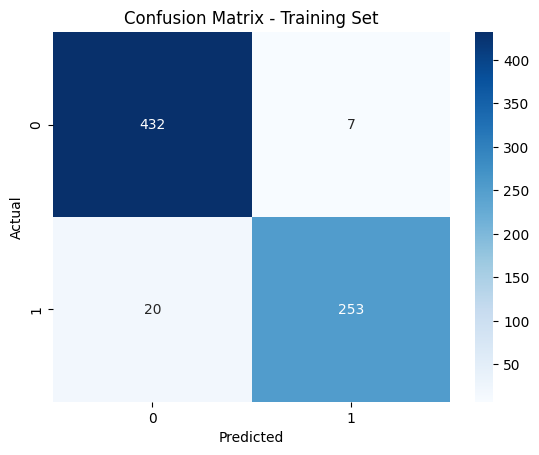

In [59]:
# Create a confusion matrix on training predictions
cm_train = confusion_matrix(y_train.astype(int), y_pred.astype(int))

# Plot heatmap
sns.heatmap(cm_train, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

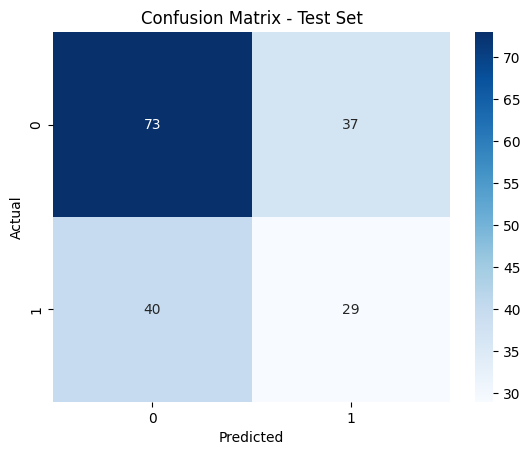

In [60]:
# Create a confusion matrix on test predictions
cm_test = confusion_matrix(y_test.astype(int), y_test_pred.astype(int))

# Plot heatmap
sns.heatmap(cm_test, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Reflection 4

How well did the model perform? Any surprises in the results?  **<span style="color: darkgreen">The Decision Tree performed very well on the training set, achieving 96% accuracy, with high precision and recall for both non-survivors and survivors. However, performance on the test set dropped to 56% accuracy, with non-survivors predicted moderately well (precision/recall ≈ 0.64) and survivors predicted poorly (precision/recall ≈ 0.42). This indicates that the model overfits the training data and does not generalize effectively. The selected features capture general trends, but they are insufficient to fully distinguish survivors from non-survivors, as reflected in both the confusion matrices and classification reports.</span>**

## Section 5. Improve the Model or Try Alternates (Implement a Second Option)

### 5.1 Train an alternative classifier (Random Forest)

In [61]:
rf_model = RandomForestClassifier(random_state=123)

rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 5.2 Evaluate and compare performance

In [62]:
# Predict on training data
y_pred_rf = rf_model.predict(X_train)
print("Results for Random Forest on Training Data")
print(classification_report(y_train, y_pred_rf))

# Predict on test data
y_test_pred_rf = rf_model.predict(X_test)
print("Results for Random Forest on Test Data")
print(classification_report(y_test, y_test_pred_rf))

Results for Random Forest on Training Data
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       439
           1       0.96      0.95      0.95       273

    accuracy                           0.96       712
   macro avg       0.96      0.96      0.96       712
weighted avg       0.96      0.96      0.96       712

Results for Random Forest on Test Data
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       110
           1       0.48      0.49      0.49        69

    accuracy                           0.60       179
   macro avg       0.58      0.58      0.58       179
weighted avg       0.60      0.60      0.60       179



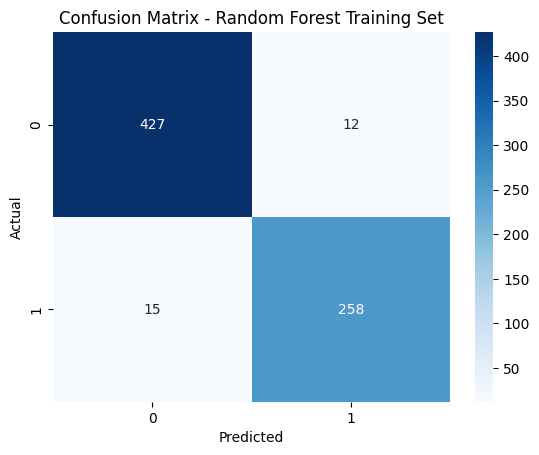

In [63]:
# Create a confusion matrix on Random Forest training predictions
cm_train_rf = confusion_matrix(y_train.astype(int), y_pred_rf.astype(int))

# Plot heatmap
sns.heatmap(cm_train_rf, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Random Forest Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

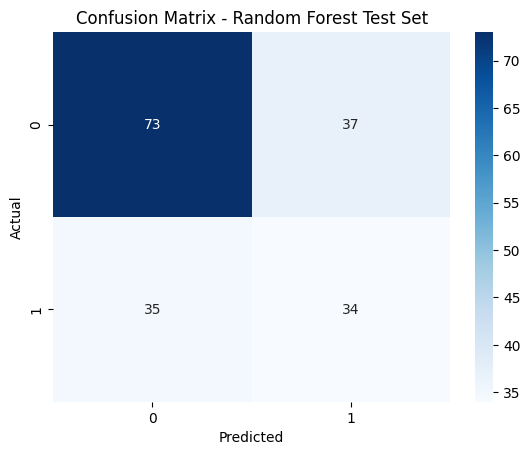

In [64]:
# Create a confusion matrix on Random Forest test predictions
cm_test_rf = confusion_matrix(y_test.astype(int), y_test_pred_rf.astype(int))

# Plot heatmap
sns.heatmap(cm_test_rf, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Random Forest Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Reflection 5

Which model performed better? Why might one classifier be more effective in this specific case?  **<span style="color: darkgreen">The Random Forest performs similarly to the Decision Tree on the training set, achieving 96% accuracy with high precision and recall for both classes, indicating a good fit. On the test set, accuracy improves slightly to 60%, and survivors are still harder to predict than non-survivors (precision/recall ≈ 0.49 vs 0.68). This suggests that while Random Forest provides a modest improvement over the Decision Tree, the selected features still limit predictive performance, and both models struggle to generalize fully. Overall, Random Forest reduces overfitting slightly but does not dramatically change the pattern observed in the Decision Tree.</span>**

## Section 6. Final Thoughts & Insights

### 6.1 Summarize findings

| Model Type      | Features Used                   | Accuracy | Precision | Recall | F1-Score | Notes                               |
|-----------------|---------------------------------|----------|-----------|--------|-----------|------------------------------------|
| Decision Tree   | Age, Fare, Pclass, Sex, FamilySize, Alone | 57%      | 54%      | 54%   | 54%      | Overfits training set; performs better on non-survivors |
| Random Forest   | Age, Fare, Pclass, Sex, FamilySize, Alone | 60%      | 58%      | 58%   | 58%      | Slight improvement over Decision Tree; still struggles with survivors |


### 6.2 Discuss challenges faced

This has been an debilitatingly frustrating experience. If I did not have off of work today (November 11), I would not have been able to finish this assignment on time at all. If the midterm is going to be expected to take up this much time, it should be assigned much earlier in the course and fully presented, not just in Week 4.

### 6.3 If you had more time, what would you try next?

I would not try anything next. I would work more fully on the midterm because I really didn't have enough time to do everything I needed/wanted to do on the midterm.